<a href="https://colab.research.google.com/github/Mikolajkunka/Missp/blob/main/pulp/Grafik_pracownikow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pulp

!sudo apt-get install coinor-cbc glpk-utils coinor-clp

     |████████████████████████████████| 40.6MB 106kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  coinor-libcbc3 coinor-libcgl1 coinor-libclp1 coinor-libcoinutils3v5
  coinor-libosi1v5 libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
Suggested packages:
  libiodbc2-dev default-libmysqlclient-dev
The following NEW packages will be installed:
  coinor-cbc coinor-clp coinor-libcbc3 coinor-libcgl1 coinor-libclp1
  coinor-libcoinutils3v5 coinor-libosi1v5 glpk-utils libamd2 libcolamd2
  libglpk40 libsuitesparseconfig5
0 upgraded, 12 newly installed, 0 to remove and 14 not upgraded.
Need to get 3,439 kB of archives.
After this operation, 9,832 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsuitesparseconfig5 amd64 1:5.1.2-2 [9,044 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libamd2 amd64 1:5.1.2-2 [19.5 kB]
Get:3 

W tym zadaniu podjeliśmy się próby ułożenia grafiku dla 6 pracowników. 
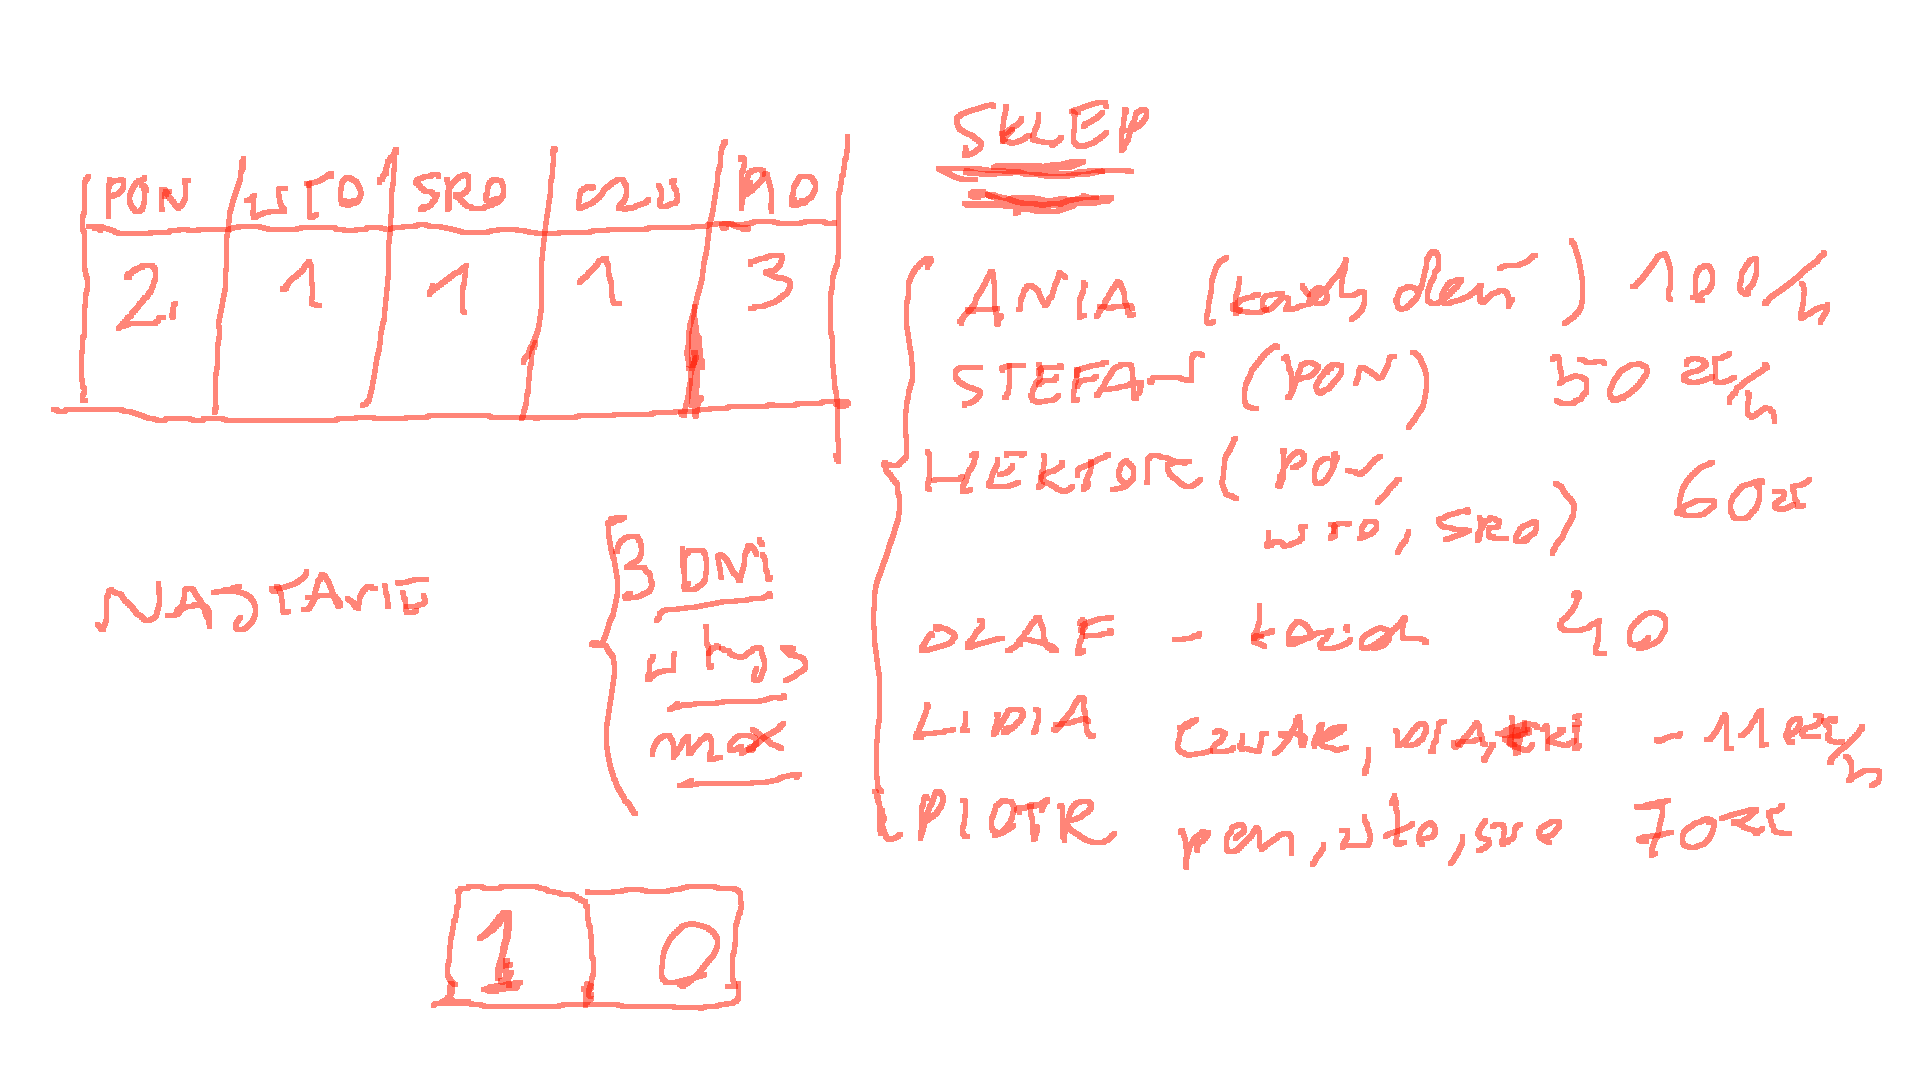

Z powyższego zdjęcia możemy uzyskać kilka informacji na temat stawki godzinowej poszczególnych pracowników oraz ich dyspozycyjność. Naszym nadrzędnym celem jest minimalizacja kosztu działania firmy, więc logiczne jest, że powinniśmy wybierać pracowników, którzy zarabiają najmniej, jednak naszym dodatkowym kryterium jest to, że:

1. Każdy z pracowników może pracować maksymalnie 3 dni w danym tygodniu.

2. Powinniśmy doprowadzić do sytuacji kiedy każdy pracownik przynajmniej raz w tygodniu przyjdzie do pracy.

3. Spełnimy dzienne zapotrzebowanie na liczbę pracowników podane w tabeli.

To zadanie okazało się dość trudne i nie zapewnia ono łatwej swobody dodawania oraz modyfikowania liczby pracowników. Należy ręcznie wprowadzać zmiany, co w przypadku dużej liczby potencjalnych pracowników może być uciązliwe.

Naszymi zmiennymi decyzyjnymi będzie obecność pracownika w danym dniu oznaczona wartością 1, natmoiast jego nieobecność będzie oznaczona wartością 0.

In [ ]:
from pulp import * #import biblioteki pulp

#LpMinimize jasno mówi Nam o tym, iż w tym zadaniu staramy się zredukować koszty
#jakie pracodawca musi ponieść, aby opłacić swoich pracowników w ciągu tygodnia pracy
prob = LpProblem("Układanie grafiku",LpMinimize)

#wynagrodzenie - stawka godzinowa każdego pracownika podana w [zł]
Stawka_Ania = 100;
Stawka_Stefan = 50;
Stawka_Hektor = 60;
Stawka_Olaf = 40;
Stawka_Lidia = 110;
Stawka_Piotr = 70;

#Do każdego osoby przypisano 5 zmiennych odpowiadających każdemu roboczemu dniu tygodnia
# od poniedziałku do piątku. Dzięki temu otrzymamy jedną z dwóch wartości liczbowych
# świadczących o tym czy dany pracownik przyjdzie do pracy konkretnego dnia czy nie.
Apon=LpVariable("Ania_Pon",0,None, LpBinary)
Awt=LpVariable("Ania_Wt",0,None, LpBinary)
Asr=LpVariable("Ania_Sr",0,None, LpBinary)
Aczw=LpVariable("Ania_Czw",0,None, LpBinary)
Apt=LpVariable("Ania_Pt",0,None, LpBinary)

Spon=LpVariable("Stefan_Pon",0,None, LpBinary)
Swt=LpVariable("Stefan_Wt",0,None, LpBinary)
Ssr=LpVariable("Stefan_Sr",0,None, LpBinary)
Sczw=LpVariable("Stefan_Czw",0,None, LpBinary)
Spt=LpVariable("Stefan_Pt",0,None, LpBinary)

Hpon=LpVariable("Hektor_Pon",0,None, LpBinary)
Hwt=LpVariable("Hektor_Wt",0,None, LpBinary)
Hsr=LpVariable("Hektor_Sr",0,None, LpBinary)
Hczw=LpVariable("Hektor_Czw",0,None, LpBinary)
Hpt=LpVariable("Hektor_Pt",0,None, LpBinary)

Opon=LpVariable("Olaf_Pon",0,None, LpBinary)
Owt=LpVariable("Olaf_Wt",0,None, LpBinary)
Osr=LpVariable("Olaf_Sr",0,None, LpBinary)
Oczw=LpVariable("Olaf_Czw",0,None, LpBinary)
Opt=LpVariable("Olaf_Pt",0,None, LpBinary)

Lpon=LpVariable("Lidia_Pon",0,None, LpBinary)
Lwt=LpVariable("Lidia_Wt",0,None, LpBinary)
Lsr=LpVariable("Lidia_Sr",0,None, LpBinary)
Lczw=LpVariable("Lidia_Czw",0,None, LpBinary)
Lpt=LpVariable("Lidia_Pt",0,None, LpBinary)

Ppon=LpVariable("Piotr_Pon",0,None, LpBinary)
Pwt=LpVariable("Piotr_Wt",0,None, LpBinary)
Psr=LpVariable("Piotr_Sr",0,None, LpBinary)
Pczw=LpVariable("Piotr_Czw",0,None, LpBinary)
Ppt=LpVariable("Piotr_Pt",0,None, LpBinary)

#minimalzacja kosztó pracy - nadrzędny cel optymalizacji
prob += (Apon+Awt+Asr+Aczw+Apt) * Stawka_Ania + (Spon+Swt+Ssr+Sczw+Spt) * Stawka_Stefan + (Hpon+Hwt+Hsr+Hczw+Hpt) * Stawka_Hektor + (Opon+Owt+Osr+Oczw+Opt) * Stawka_Olaf + (Lpon+Lwt+Lsr+Lczw+Lpt) * Stawka_Lidia + (Ppon+Pwt+Psr+Pczw+Ppt) * Stawka_Piotr, "minimalizacja kosztów"

#liczba osób potrzebnych w danym dniu
prob += Apon + Spon + Hpon + Opon + Lpon + Ppon == 2
prob += Awt + Swt + Hwt + Owt + Lwt + Pwt == 1
prob += Asr + Ssr + Hsr + Osr + Lsr + Psr == 1
prob += Aczw + Sczw + Hczw + Oczw + Lczw + Pczw == 1
prob += Apt + Spt + Hpt + Opt + Lpt + Ppt == 3

#ograniczenie ilosci zmian do maksymalnie 3
prob += Apon+Awt+Asr+Aczw+Apt <= 3
prob += Spon+Swt+Ssr+Sczw+Spt <= 3
prob += Hpon+Hwt+Hsr+Hczw+Hpt <= 3
prob += Opon+Owt+Osr+Oczw+Opt <= 3
prob += Lpon+Lwt+Lsr+Lczw+Lpt <= 3
prob += Ppon+Pwt+Psr+Pczw+Ppt <= 3

#Dostępność - w celu ułożenia grafiku musimy brać pod uwagę w jakie dni Nasz pracownik
# jest dostępny. Jeśli Stefan może przyjść tylko w poniedziałek to całkowita suma pozostałych
# dni tygodnia powinna dać wartość równą 0. Analogicznie wykonujemy to dla wszystkich pracowników
prob += Swt + Ssr + Sczw + Spt == 0
prob += Hczw + Hpt == 0
prob += Lczw + Lpt == 0
prob += Pczw + Ppt == 0
 
prob.writeLP("Grafik.lp") #oznaczenie problemu

prob.solve() #Wywołanie funkcji rozwiązującej problem
print("Status:", LpStatus[prob.status])

#Wyświetlenie obliczonego minimalnego kosztu zatrudnienia pracowników przez tydzień
print("Koszt zatrudnienia pracowników:",value(prob.objective),"ZŁ")  

print()

#Wydruk grafiku w postaci listy wraz z obecnością lub nieobecnością w danym dniu
for v in prob.variables():
    print(v.name, "=", v.varValue)

Status: Infeasible
Koszt zatrudnienia pracowników: 500.0 ZŁ

Ania_Czw = 0.0
Ania_Pon = 0.0
Ania_Pt = 1.0
Ania_Sr = 0.0
Ania_Wt = 0.0
Hektor_Czw = 0.0
Hektor_Pon = 1.0
Hektor_Pt = 0.0
Hektor_Sr = 0.0
Hektor_Wt = 1.0
Lidia_Czw = 0.0
Lidia_Pon = 0.0
Lidia_Pt = 1.0
Lidia_Sr = 0.0
Lidia_Wt = 0.0
Olaf_Czw = 1.0
Olaf_Pon = 0.0
Olaf_Pt = 1.0
Olaf_Sr = 1.0
Olaf_Wt = 0.0
Piotr_Czw = 0.0
Piotr_Pon = 0.0
Piotr_Pt = 0.0
Piotr_Sr = 0.0
Piotr_Wt = 0.0
Stefan_Czw = 0.0
Stefan_Pon = 1.0
Stefan_Pt = 0.0
Stefan_Sr = 0.0
Stefan_Wt = 0.0


/usr/local/lib/python3.6/dist-packages/pulp/pulp.py:1198: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [ ]:
Status: Infeasible
Koszt zatrudnienia pracowników: 500.0 ZŁ

Ania_Czw = 0.0
Ania_Pon = 0.0
Ania_Pt = 1.0
Ania_Sr = 0.0
Ania_Wt = 0.0
Hektor_Czw = 0.0
Hektor_Pon = 1.0
Hektor_Pt = 0.0
Hektor_Sr = 0.0
Hektor_Wt = 1.0
Lidia_Czw = 0.0
Lidia_Pon = 0.0
Lidia_Pt = 1.0
Lidia_Sr = 0.0
Lidia_Wt = 0.0
Olaf_Czw = 1.0
Olaf_Pon = 0.0
Olaf_Pt = 1.0
Olaf_Sr = 1.0
Olaf_Wt = 0.0
Piotr_Czw = 0.0
Piotr_Pon = 0.0
Piotr_Pt = 0.0
Piotr_Sr = 0.0
Piotr_Wt = 0.0
Stefan_Czw = 0.0
Stefan_Pon = 1.0
Stefan_Pt = 0.0
Stefan_Sr = 0.0
Stefan_Wt = 0.0

Z powyższego listingu możemy zauważyć, że optymalizacja przebiegła w taki sposób, iż
pracownik o imieniu Piotr nie został przydzielony do pracy żadnego dnia nawet pomimo tego,
że jest stawka godzinowa nie była największa.

Program należałoby dopracować w taki sposób, aby możliwość dodawania kolejnych pracowników
była prostsza. Dzięki temu zadaniu widzimy, że nawet taka prosta czynność jak ułożenie
grafiku jest w dzisiejszych czasach realizowana przy pomocy odpowiednich programów
komputerowych i porawdopodobnie działa na analogicznej zasadzie jak ta przetestowana w 
powyższym programie.